### 4. Machine Learning Models  ###

In here, in order to identify the schools that require attention, we identify schools that has 'Standard Not Met', using this we could figure out which school needs attention. We also can deduce the feature importance that impact lower scores. 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from collections import Counter
from statistics import stdev, mean
import operator

In [149]:
df = pd.read_csv('cleaned_school_df.csv', sep='\t', encoding='utf-8')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,...,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
0,1,All Students,All Students,2,61333,6002794,5,9.09,18.18,63.64,...,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
1,1,All Students,All Students,2,61333,6002794,13,9.52,33.33,52.38,...,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
2,1,All Students,All Students,6,61622,118729,5,0.94,10.38,55.66,...,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
3,1,All Students,All Students,6,61622,118729,13,0.94,10.38,55.66,...,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
4,1,All Students,All Students,6,61622,637504,8,0.00,3.96,45.54,...,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0


In [150]:
df_schools = pd.read_csv('df_schools.csv', sep='\t', encoding='utf-8')
df_schools.drop("Unnamed: 0", axis=1, inplace=True)

In [151]:
important_features = pd.read_csv('important_features.csv', sep='\t', encoding='utf-8')
important_features.drop("Unnamed: 0", axis=1, inplace=True)
important_features = important_features['feature'].tolist()

In [152]:
target_col = 'Target_Percentage Standard Not Met'

### Regression ###

Our target value here (as mentioed above) is the Target_avg_Percentage Standard Not Met.

In [153]:
no_need_cols = ['Target_Percentage Standard Exceeded', 'Target_Percentage Standard Met',
       'Target_Percentage Standard Nearly Met', 'Target_Met_Exceeded', 'Num_All Students_All Students',
       'Rank_4', 'Rank_1', 'Attention']

In [154]:
X_num = df_schools.loc[:,[cols for cols in df_schools.columns.str.contains('Pct') == False]]
X_pct = df_schools.loc[:,[cols for cols in df_schools.columns.str.contains('Num') == False]]
targ_cols = [cols.startswith('Target_') for cols in df_schools.columns]
X = df_schools.drop(columns=['School Code'])
X_num = X_num.drop(columns=['School Code'])
X_pct = X_pct.drop(columns=['School Code'])
X = X.drop(columns='Target_Percentage Standard Not Met')
y = df_schools['Target_Percentage Standard Not Met']

X_feat = df_schools[important_features]

X_all = X.copy()
X_all_Num = X_num.copy()
X_all_Pct = X_pct.copy()

target_var_name = target_col
X_feat = X_feat.drop([target_var_name], axis=1)
y = df_schools[target_var_name].round(0)
X = X.drop(columns=no_need_cols)

#Data
print("Target variable: ", target_var_name)
print("Number of instances: ", X.shape[0])
print("Independent variables (size:{})".format(X.columns.size))
print(X.columns)  #important_features = X.columns

#save
reg_name = []
reg_result = []

Target variable:  Target_Percentage Standard Not Met
Number of instances:  157
Independent variables (size:80)
Index(['Num_Disability Status_Students with disability',
       'Num_Disability Status_Students with no reported disability',
       'Num_Economic Status_Economically disadvantaged',
       'Num_Economic Status_Not economically disadvantaged',
       'Num_English-Language Fluency_English learner',
       'Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more',
       'Num_English-Language Fluency_English only',
       'Num_English-Language Fluency_Ever-ELs',
       'Num_English-Language Fluency_Fluent English proficient and English only',
       'Num_English-Language Fluency_Initial fluent English proficient (IFEP)',
       'Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)',
       'Num_Ethnicity_American Indian or Alaska Native', 'Num_Ethnicity_Asian',
       'Num_Ethnicity_Filipino', 'Num_Ethnicity_Hispanic o

### Regression ###

#### Evaluation Metrics ####

We could use the following eval metrics for our regression problem:
- RMSE
- R^2
- MAE
- Adj R^2

#### Cross Validation ####

We use K-Fold cross validation, since it is thorough and better to get an eval on unseen data.

### Linear Regression Model ###

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(109, 80) (109,)
(48, 80) (48,)


In [156]:
from sklearn.linear_model import LinearRegression

name = "Linear Regression"
cv_name = "Train and test split"
n_splits = 1

model = LinearRegression()
model.fit(X_train, y_train)

print("Model: {}, Cross Validation: {}, Number splits: {}".format(name, cv_name, n_splits))

Model: Linear Regression, Cross Validation: Train and test split, Number splits: 1


In [157]:
coeff_df = pd.DataFrame((model.coef_).round(2), X.columns, columns=['Coefficient'])  
coeff_df.loc[coeff_df['Coefficient'].abs().sort_values(ascending=False).index]

,Coefficient
Pct_Ethnicity for Not Economically Disadvantaged_Asian,-5.79
Pct_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native,4.92
Pct_Ethnicity_Two or more races,-4.80
Num_English-Language Fluency_Initial fluent English proficient (IFEP),4.61
Num_Ethnicity_American Indian or Alaska Native,-4.31
...,...
Num_Gender_Male,0.04
Pct_Economic Status_Not economically disadvantaged,-0.03
Pct_Parent Education_Some college (includes AA degree),-0.03
Median,-0.00


In [158]:
y_pred = model.predict(X_test)
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result.head()

,Actual,Predicted
23,50.0,18.100043
70,18.0,105.305211
115,37.0,30.308700
71,25.0,35.883449
53,12.0,-40.952772


In [159]:
from sklearn.model_selection import KFold

n_splits = 10
seed = 7

print("Cross Validation: {} {} {}{}".format(cv_name, "(K =", n_splits, ")"))
kfold = KFold(n_splits=n_splits, random_state=seed) # Define the split

Cross Validation: Train and test split (K = 10)


C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [160]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, cross_val_predict

In [161]:
name = "Linear Regression"
cv_name = "K folds"
model = LinearRegression()
scoring_reg = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


scores = cross_validate(model, X, y, cv=kfold, scoring=scoring_reg)

print("\n**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Number splits: {}".format(name, cv_name, "(K =", n_splits, ")", n_splits))

rmse = (-1*mean(scores['test_neg_mean_squared_error']))**0.5
mae = -1*mean(scores['test_neg_mean_absolute_error'])
r2 = mean(scores['test_r2'])

print(f'Root Mean Squared Error(RMSE): {rmse: 0.4f}, Mean Absolute Error(MAE): {mae: 0.4f}, R^2 score: {r2: 0.4f}')

#save
reg_name.append(name + " with " + str(n_splits) + " folds CV")
reg_result.append(('%.4f' %rmse, '%.4f' %mae, '%.4f' %r2))


**Results**
Model: Linear Regression, Cross Validation: K folds (K = 10), Number splits: 10
Root Mean Squared Error(RMSE):  277.6088, Mean Absolute Error(MAE):  58.5650, R^2 score: -265.7826


Text(0, 0.5, 'Predicted values')

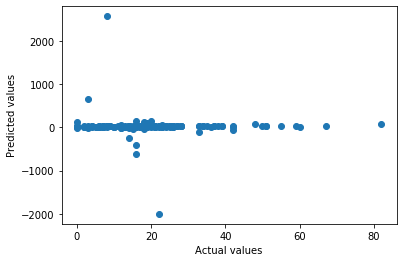

In [162]:
y_pred = cross_val_predict(model, X, y, cv=kfold)
plt.scatter(y, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

We could try using statsmodel to see how well the p score can clarify the feature importance and detailed report of various statistical significance.

In [163]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [164]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                    OLS Regression Results                                    
Dep. Variable:     Target_Percentage Standard Not Met   R-squared:                       0.720
Model:                                            OLS   Adj. R-squared:                  0.446
Method:                                 Least Squares   F-statistic:                     2.634
Date:                                Mon, 28 Sep 2020   Prob (F-statistic):           1.38e-05
Time:                                        14:26:22   Log-Likelihood:                -533.52
No. Observations:                                 157   AIC:                             1223.
Df Residuals:                                      79   BIC:                             1461.
Df Model:                                          77                                         
Covariance Type:                            nonrobust                                         
                                                  

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



#### Lets use other Regressors ####
 - Random Forest Regressor
 - Gradient Boosting Regressor
 - Support Vector Regressor - We shall ignore this since its computationally intensive.

In [165]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

cv_name = "K folds"

models = {
 'Random Forest Regressor': RandomForestRegressor(n_estimators=50, random_state=0),
 'Gradient Boosting for Regression': GradientBoostingRegressor(max_depth=1, random_state=0),
 #'Support Vector Regression': SVR(kernel='linear') #too much complex with over 8700 samples
}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=kfold,
                            scoring=scoring_reg)
    print("\n**Results**")
    print("Model: {}, Cross Validation: {} {} {}{}, Number splits: {}".format(name, cv_name, "(K =", n_splits, ")", n_splits))

    rmse = (-1*mean(scores['test_neg_mean_squared_error']))**0.5
    mae = -1*mean(scores['test_neg_mean_absolute_error'])
    r2 = mean(scores['test_r2'])  
    print(f'Root Mean Squared Error(RMSE): {rmse: 0.4f}, Mean Absolute Error(MAE): {mae: 0.4f}, R^2 score: {r2: 0.4f}')
    
    reg_name.append(name + " with " + str(n_splits) + " folds CV")
    reg_result.append(('%.4f' %rmse, '%.4f' %mae, '%.4f' %r2))


**Results**
Model: Random Forest Regressor, Cross Validation: K folds (K = 10), Number splits: 10
Root Mean Squared Error(RMSE):  12.6152, Mean Absolute Error(MAE):  9.0968, R^2 score: -0.2778

**Results**
Model: Gradient Boosting for Regression, Cross Validation: K folds (K = 10), Number splits: 10
Root Mean Squared Error(RMSE):  12.8225, Mean Absolute Error(MAE):  9.0153, R^2 score: -0.3720


#### Summary of Regression result ####

In [166]:
print("Model Accuracy Results:")
for res in reg_result:
    print(reg_name[reg_result.index(res)], ":", "RMSE: ", res[0], ", MAE: ", res[1], ", R^2: ", res[2])

Model Accuracy Results:
Linear Regression with 10 folds CV : RMSE:  277.6088 , MAE:  58.5650 , R^2:  -265.7826
Random Forest Regressor with 10 folds CV : RMSE:  12.6152 , MAE:  9.0968 , R^2:  -0.2778
Gradient Boosting for Regression with 10 folds CV : RMSE:  12.8225 , MAE:  9.0153 , R^2:  -0.3720


a negative R value means the model is poorly fitting the data. However the best model we can go ahead with is Random Forest.

### Classification ###

From the 'Exploratory Data Analysis' notebook we assigned schools in which more than 60% have not met the standards as a school that needs 'Attention', where a value of 1 represents the school needing help and 0 being school is ok.

In [167]:
target_col2='Attention'

#ver 1.
# X = df_schools.drop(getColumns(df_schools, ["English", "Mathematics", "Target", "Rank"], "OR"), axis=1)
# X = X.drop(['School Code'], axis=1)

#ver.
X = df_schools.drop(getColumns(df_schools, ["English", "Mathematics", "All Students", "Target", "Rank"], "OR"), axis=1)
X = X.drop(['School Code'], axis=1)

#ver.
# X = df_schools[attr_important_features]
# X = X.drop(getColumns(X, ["Target", "Rank", "Pct"], "OR"), axis=1)

print("Target variable:", target_col2)
print("Number of instances")
print(target_col2,"== 0: ", len(X.loc[X[target_col2] == 0]))
print(target_col2,"== 1: ", len(X.loc[X[target_col2] == 1]))
pctOneTarget = (len(X.loc[X[target_col2]==1])) / (len(X.loc[X[target_col2]==0])) * 100
print("The percentage of target == 1 over target == 0: ", '%0.2f' % pctOneTarget , "%\n")



#Data
y = df_schools[target_col2]
X = X.drop([target_col2], axis=1)

print("Number of data: ", X.shape[0])
print("Independent variables (size:{})".format(X.columns.size))
print(X.columns) 

#Results
clf_name = []
clf_result = []
clf_best = []

Target variable: Attention
Number of instances
Attention == 0:  152
Attention == 1:  5
The percentage of target == 1 over target == 0:  3.29 %

Number of data:  157
Independent variables (size:65)
Index(['Num_Disability Status_Students with disability',
       'Num_Disability Status_Students with no reported disability',
       'Num_Economic Status_Economically disadvantaged',
       'Num_Economic Status_Not economically disadvantaged',
       'Num_Ethnicity_American Indian or Alaska Native', 'Num_Ethnicity_Asian',
       'Num_Ethnicity_Filipino', 'Num_Ethnicity_Hispanic or Latino',
       'Num_Ethnicity_Two or more races', 'Num_Ethnicity_White',
       'Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native',
       'Num_Ethnicity for Economically Disadvantaged_Asian',
       'Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino',
       'Num_Ethnicity for Economically Disadvantaged_Two or more races',
       'Num_Ethnicity for Economically Disadvanta

Since the data is completely skewed towards school that are above average (standar met or exceeded), we must balance the data using one of data balanacing techniques, we choose SMOTE since we want to oversample the minority class here.

In [184]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=5)
print(sorted(Counter(y_train).items()))
oversample = BorderlineSMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train)
print(sorted(Counter(y_res).items()))

[(0, 105), (1, 4)]
[(0, 105), (1, 4)]


In [185]:
# Save results

def saveClfModelResultCV(results, name):
    print('Accuracy: {:.4f}'.format(mean(results['test_accuracy'])))
    print('Precision: {:.4f}'.format(mean(results['test_precision'])))
    print('Recall: {:.4f}'.format(mean(results['test_recall'])))
    print('f1-score: {:.4f}'.format(mean(results['test_f1'])))
    print('roc_auc_score: {:.4f}'.format(mean(results['test_roc_auc'])))

    print("**Weighted average scores**")
    print('Weighted Avg Precision : {:.4f}'.format(mean(results['test_precision_weighted'])))
    print('Weighted Avg Recall : {:.4f}'.format(mean(results['test_recall_weighted'])))
    print('Weighted Avg f1-score : {:.4f}'.format(mean(results['test_f1_weighted'])))

    #save start
    clf_name.append(name)
    clf_result.append("")    
    clf_best.append(("",
                    '%.4f' %mean(results['test_accuracy']),
                    '%.4f' %mean(results['test_roc_auc']),
                    '%.4f' %mean(results['test_precision_weighted']),
                    '%.4f' %mean(results['test_recall_weighted']),
                    '%.4f' %mean(results['test_f1_weighted'])))

In [186]:
def saveClfModelResultGridCV(clfObj, name):
    #GridSearchCV
    results = clfObj.cv_results_
    best_idx = clfObj.best_index_
    
    print("\nBest parameters: ", clfObj.best_params_)
    print("Best model: ", clfObj.best_estimator_)

    #clf_result[0]
    print("\nBest Accuracy: {:.4f}".format(results['mean_test_accuracy'][best_idx]))
    #clf_result[1]
    print('Best roc_auc_score: {:.4f}'.format(results['mean_test_roc_auc'][best_idx]))
    #print('Mean roc_auc_score: {:.4f}'.format(mean(results['mean_test_roc_auc'])))

    print("**Weighted average scores**")
    print("Weighted Avg Precision: {:.4f}".format(results['mean_test_precision_weighted'][best_idx]))
    print("Weighted Avg Recall: {:.4f}".format(results['mean_test_recall_weighted'][best_idx]))
    print("Weighted Avg f1-score: {:.4f}".format(results['mean_test_f1_weighted'][best_idx]))

    #save start
    clf_name.append(name)
    clf_result.append((results['mean_test_accuracy'],
                       results['mean_test_roc_auc'],
                       results['mean_test_precision_weighted'],
                       results['mean_test_recall_weighted'],
                       results['mean_test_f1_weighted']
                      ))
    
    clf_best.append((clfObj.best_params_,
                    '%.4f' %results['mean_test_accuracy'][best_idx],
                    '%.4f' %results['mean_test_roc_auc'][best_idx],
                    '%.4f' %results['mean_test_precision_weighted'][best_idx],
                    '%.4f' %results['mean_test_recall_weighted'][best_idx],
                    '%.4f' %results['mean_test_f1_weighted'][best_idx]))
                    #'%.4f' %mean(results['mean_test_roc_auc'])

Since the data is quite imbalanced, we need to use a SMOTE technique to balance the dataset.

Evaluation metrics used for Classification problem includes:
- Precision, Accuracy, Recall
- AUC & ROC
- F1 score

In [187]:
def getSetofMetrics(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    print("FP:", FP)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    print("FN:", FN)
    TP = np.diag(cnf_matrix)
    print("TP:", TP)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    print("TN:", TN)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Precision #PPV
    precision = TP/(TP+FP) #positive predictive value
    # Recall #TPR  #true positive rate
    recall = TP/(TP+FN) #sensitivity, hit rate
    # F1
    f1 = 2*((precision*recall)/(precision+recall))
    # false positive rate
    FPR = FP/(FP+TN) #Fall out  
    # false negative rate
    FNR = FN/(TP+FN)    
    # true negative rate
    TNR = TN/(TN+FP) #Specificity    
    # Negative predictive value
    NPV = TN/(TN+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    FP, FN, TP, TN, TNR, NPV, FDR, ACC
    return precision, recall, f1, FPR, FNR

In [188]:
pd.DataFrame(
    [['TN', 'FP'], ['FN', 'TP']],
    columns=['Predicted Not', 'Predicted'],
    index=['True Not', 'True']
)

,Predicted Not,Predicted
True Not,TN,FP
True,FN,TP


### Logistic Regression ###

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #see classification metrics: https://scikit-learn.org/stable/modules/classes.html  
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 


name = "Logistic Regression"
cv_name = "Train and test split"
n_splits = 1

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n**Results**")
print("Model: {}, Cross Validation: {}, Number splits: {}".format(name, cv_name, n_splits))
print('Classification Report: \n', classification_report(y_test, y_pred), '\n')

print(f'Accuracy: {accuracy_score(y_test, y_pred): 0.4f}')
#print(f'roc_auc_score: {roc_auc_score(y_test, y_pred): 0.4f}')

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
# print("**Weighted average scores**")
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F-score   : {:.4f}'.format(fscore))
#print('Support   : {}'.format(support))


**Results**
Model: Logistic Regression, Cross Validation: Train and test split, Number splits: 1
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.00      0.00      0.00         1

    accuracy                           0.98        48
   macro avg       0.49      0.50      0.49        48
weighted avg       0.96      0.98      0.97        48
 

Accuracy:  0.9792
Precision : 0.9588
Recall    : 0.9792
F-score   : 0.9689


C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Stratified K-Fold CV ####

In [191]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

def classification_report_with_as(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [192]:
cv_name = "Stratified K-Folds CV"
n_splits = 5
seed = 7

print("Stratified K-Folds Cross Validation: {} {} {}{}".format(cv_name, "(K =", n_splits, ")"))
kfold = StratifiedKFold(n_splits=n_splits, random_state=seed) # Define the split 
#kfold = KFold(n_splits=n_splits, random_state=seed) # Define the split 

name = "Logistic Regression"
model = LogisticRegression(solver='liblinear')

score_acc = []
score_precision = []
score_recall = []
score_f1 = []
score_auc = []

score_precision2 = []
score_recall2 = []
score_f12 = []

k=0

for train_index, test_index in kfold.split(X,y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    model.fit(X_train, y_train)    
    
    y_pred = model.predict(X_test)
    df_logistic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
   
    try:
        k=k+1
        print("K =", k)
        
        score_acc.append(accuracy_score(y_test, y_pred))
        score_precision.append(precision_score(y_test, y_pred))
        score_recall.append(recall_score(y_test, y_pred))
        score_f1.append(f1_score(y_test, y_pred))
        score_auc.append(roc_auc_score(y_test, y_pred))
        
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        score_precision2.append(precision)
        score_recall2.append(recall)
        score_f12.append(fscore)

    except ValueError:
        pass
    
    print(classification_report(y_test, y_pred), '\n')

print("\n**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Number splits: {}".format(name, cv_name, "(K =", n_splits, ")", n_splits))


print(f'Accuracy: {np.mean(score_acc): 0.4f}')
print(f'Precision: {np.mean(score_precision): 0.4f}')
print(f'Recall: {np.mean(score_recall): 0.4f}')
print(f'f1-score: {np.mean(score_f1): 0.4f}')
print(f'roc_auc_score: {np.mean(score_auc): 0.4f}')

print("**Weighted average scores**")
print(f'Weighted Avg Precision: {np.mean(score_precision2): 0.4f}')
print(f'Weighted Avg Recall: {np.mean(score_recall2): 0.4f}')
print(f'Weighted Avg f1-score: {np.mean(score_f12): 0.4f}')

Stratified K-Folds Cross Validation: Stratified K-Folds CV (K = 5)
K = 1
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32
 

K = 2
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32
 

K = 3
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `

### Decision Tree Model ###

In [193]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
name = "Decision Tree"
cv_name = "Train and test split"
n_splits = 1


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size = 0.4, random_state=5)

#criterion='entropy', default='gini'
dtree = DecisionTreeClassifier(random_state=seed)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=7)

In [194]:
feature_importances = pd.DataFrame(dtree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).abs().sort_values('importance', ascending=False)
feature_importances

,importance
Pct_Disability Status_Students with disability,0.489130
Num_Disability Status_Students with no reported disability,0.177701
Median,0.174074
Num_Homeless Status_Not Homeless,0.104697
Pct_Homeless Status_Not Homeless,0.054398
...,...
Num_Parent Education_High school graduate,0.000000
Num_Parent Education_Not a high school graduate,0.000000
Num_Parent Education_Some college (includes AA degree),0.000000
Num_Economic Status_Economically disadvantaged,0.000000


In [195]:
y_pred = dtree.predict(X_test)
print('\nClassification Report: \n', classification_report(y_test, y_pred), '\n')


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.00      0.00      0.00         1

    accuracy                           0.97        63
   macro avg       0.49      0.49      0.49        63
weighted avg       0.97      0.97      0.97        63
 



In [196]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['[Predicted Not] '+ 'Attention', '[Predicted] '+ 'Attention'],
    index=['[True Not] '+ 'Attention', '[True] '+ 'Attention']
)

,[Predicted Not] Attention,[Predicted] Attention
[True Not] Attention,61,1
[True] Attention,1,0


In [197]:
def getROCAUC_crossval(clfObj, name, X_train, y_train, X_test, y_test):

    clfObj.fit(X_train, y_train)
    
    # y_pred = clfObj.predict(X_test)
    probs = clfObj.predict_proba(X_test) # returns probability estimates for test set 
    y_pred_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)  
    roc_auc = auc(fpr, tpr)
    
    plt.title(name + '\nReceiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

In [198]:
def getROCAUC(clfObj, name, X_test, y_test):

    y_pred = clfObj.predict(X_test)
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title(name + '\nReceiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

In [199]:
def getROCAUCProb(clfObj, name, X_test, y_test):
    probs = clfObj.predict_proba(X_test) # returns probability estimates for test set 
    y_pred_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.title(name + '\nReceiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

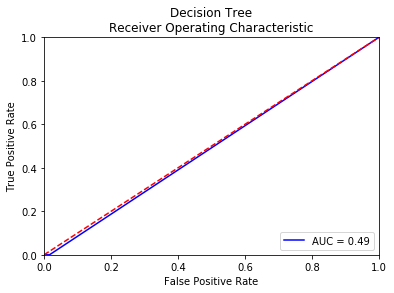

In [200]:
result_auc = getROCAUCProb(dtree, name, X_test, y_test)


#### K-Fold Cross Validation For Decision Tree ####

In [201]:
scoring_clf = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 
               'precision_weighted', 'recall_weighted', 'f1_weighted']

#Decision Tree
name = "Decision Tree"
cv_name = "Stratified K-Folds CV"
cv_name_save = "Stratified CV"
n_splits = 5
save_name = name+" using Stratified "+str(n_splits)+"-Folds CV"

#criterion='entropy', default='gini'
dtree = DecisionTreeClassifier(random_state=seed)

#results of arrays each of 5 elements (5 folds cv) 
results = cross_validate(dtree, X, y, cv=kfold, scoring=scoring_clf, return_estimator=True)

print("\n**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Number splits: {}".format(name, cv_name, "(K =", n_splits, ")", n_splits))

#save start
saveClfModelResultCV(results, save_name)

#print(results['estimator'])


**Results**
Model: Decision Tree, Cross Validation: Stratified K-Folds CV (K = 5), Number splits: 5
Accuracy: 0.9683
Precision: 0.3000
Recall: 0.4000
f1-score: 0.3333
roc_auc_score: 0.6934
**Weighted average scores**
Weighted Avg Precision : 0.9593
Weighted Avg Recall : 0.9683
Weighted Avg f1-score : 0.9631


C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

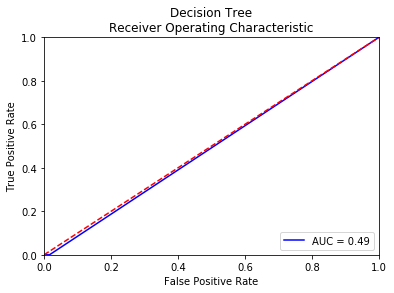

In [202]:
result_auc = getROCAUC_crossval(dtree, name, X_train, y_train, X_test, y_test)


#### GridSearchCV for parameter tuning ####

In [204]:
from sklearn.model_selection import GridSearchCV


scoring_clf_gridcv = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = {
    'max_depth': [50, 75, 100], #list(range(1,5))
    'min_samples_leaf': [1, 2, 4, 8, 10]
}


#Decision Tree
name = "Decision Tree with GridSearchCV"
cv_name = "Stratified K-Folds CV"
cv_name_save = "Stratified CV"
dtree = DecisionTreeClassifier(random_state=seed)
n_splits = num_folds = 3
save_name = name
#+" using Stratified "+str(n_splits)+"-Folds CV"



# need the standard metric - accuracy
dtc_grid = GridSearchCV(estimator = dtree, param_grid = param_grid,
                  scoring=scoring_clf_gridcv,  cv = num_folds, n_jobs = -1, refit='accuracy', return_train_score=True)

# instantiate and fit the grid
dtc_grid.fit(X_train, y_train)

print("**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Grid Search CV with parameters: {}".format(name, cv_name, "(K =", n_splits, ")", param_grid))


print(pd.DataFrame(dtc_grid.cv_results_)[['mean_test_accuracy', 'std_test_accuracy', 'params']])

y_pred = dtc_grid.predict(X_test)
print('\nClassification Report: \n', classification_report(y_test, y_pred), '\n')

print('\nConfusion Matrix:')
target_col2='Attention'

print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['[Predicted Not] '+target_col2, '[Predicted] '+target_col2],
    index=['[True Not] '+target_col2, '[True] '+target_col2]
))



saveClfModelResultGridCV(dtc_grid, save_name)

**Results**
Model: Decision Tree with GridSearchCV, Cross Validation: Stratified K-Folds CV (K = 3), Grid Search CV with parameters: {'max_depth': [50, 75, 100], 'min_samples_leaf': [1, 2, 4, 8, 10]}
    mean_test_accuracy  std_test_accuracy  \
0             0.979167           0.029463   
1             0.968414           0.025520   
2             0.957661           0.014256   
3             0.957661           0.014256   
4             0.957661           0.014256   
5             0.979167           0.029463   
6             0.968414           0.025520   
7             0.957661           0.014256   
8             0.957661           0.014256   
9             0.957661           0.014256   
10            0.979167           0.029463   
11            0.968414           0.025520   
12            0.957661           0.014256   
13            0.957661           0.014256   
14            0.957661           0.014256   

                                        params  
0     {'max_depth': 50, 'min_s

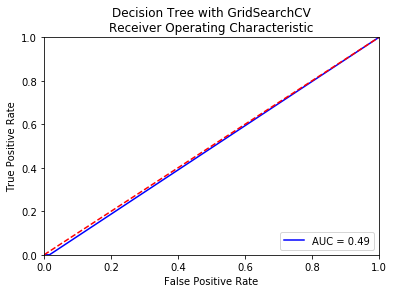

In [205]:
result_auc = getROCAUCProb(dtc_grid, name, X_test, y_test)

In [206]:
feature_importances = pd.DataFrame(dtc_grid.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).abs().sort_values('importance', ascending=False)
feature_importances

,importance
Pct_Disability Status_Students with disability,0.489130
Num_Disability Status_Students with no reported disability,0.177701
Median,0.174074
Num_Homeless Status_Not Homeless,0.104697
Pct_Homeless Status_Not Homeless,0.054398
...,...
Num_Parent Education_High school graduate,0.000000
Num_Parent Education_Not a high school graduate,0.000000
Num_Parent Education_Some college (includes AA degree),0.000000
Num_Economic Status_Economically disadvantaged,0.000000


### Random Forest Classifier with GridSearchCV ###

In [208]:
from sklearn.ensemble import RandomForestClassifier

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth':[100, 150, 200],
    'min_samples_leaf':[1, 2, 4]
}

#Random Forest Classifier
name = "Random Forest Classifier with GridSearchCV"
cv_name = "Stratified K-Folds CV"
cv_name_save = "Stratified CV"
n_splits = num_folds = 3
save_name = name
#+" using Stratified "+str(n_splits)+"-Folds CV"

rfc = RandomForestClassifier()

# instantiate the grid
rfc_grid = GridSearchCV(estimator = rfc, param_grid = param_grid,
                  scoring=scoring_clf_gridcv,  cv = num_folds, n_jobs = -1, refit='accuracy', return_train_score=True)

# instantiate and fit the grid
rfc_grid.fit(X_train, y_train)


print("**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Grid Search CV with parameters: {}".format(name, cv_name, "(K =", n_splits, ")", param_grid))

print(pd.DataFrame(rfc_grid.cv_results_)[['mean_test_accuracy', 'std_test_accuracy', 'params']])

y_pred = rfc_grid.predict(X_test)
print('\nClassification Report: \n', classification_report(y_test, y_pred), '\n')

print('\nConfusion Matrix:')
target_col2='Attention'

print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['[Predicted Not] '+target_col2, '[Predicted] '+target_col2],
    index=['[True Not] '+target_col2, '[True] '+target_col2]
))

saveClfModelResultGridCV(rfc_grid, save_name)

**Results**
Model: Random Forest Classifier with GridSearchCV, Cross Validation: Stratified K-Folds CV (K = 3), Grid Search CV with parameters: {'n_estimators': [100, 150, 200], 'max_depth': [100, 150, 200], 'min_samples_leaf': [1, 2, 4]}
    mean_test_accuracy  std_test_accuracy  \
0             0.946909           0.014754   
1             0.946909           0.014754   
2             0.946909           0.014754   
3             0.957661           0.014256   
4             0.957661           0.014256   
5             0.957661           0.014256   
6             0.957661           0.014256   
7             0.957661           0.014256   
8             0.957661           0.014256   
9             0.946909           0.014754   
10            0.946909           0.014754   
11            0.946909           0.014754   
12            0.957661           0.014256   
13            0.957661           0.014256   
14            0.957661           0.014256   
15            0.957661           0.014256

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [209]:
feature_importances = pd.DataFrame(rfc_grid.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).abs().sort_values('importance', ascending=False)
feature_importances

,importance
Num_Disability Status_Students with no reported disability,0.165769
Pct_Disability Status_Students with no reported disability,0.140572
Pct_Disability Status_Students with disability,0.127176
Num_Homeless Status_Not Homeless,0.123035
Num_Military Status_Not Military,0.079714
...,...
Num_Ethnicity_American Indian or Alaska Native,0.000000
Num_Ethnicity_Two or more races,0.000000
Pct_Ethnicity_Asian,0.000000
Pct_Ethnicity_Filipino,0.000000


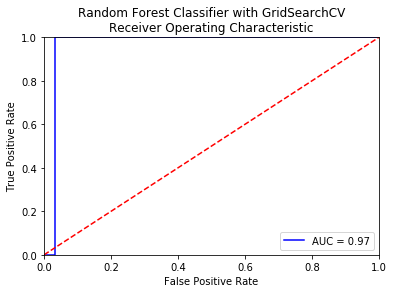

In [210]:
result_auc = getROCAUCProb(rfc_grid, name, X_test, y_test)

### k-Nearest Neighbors Classifier with GridSearchCV ###


In [211]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1,31,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


name = "K-Nearest Neighbor with GridSearchCV (No Scale)"
cv_name = "Stratified K-Folds CV"
cv_name_save = "Stratified CV"
_splits = num_folds = 3
save_name = name
#+" using Stratified "+str(n_splits)+"-Folds CV"

knn_noscale = KNeighborsClassifier()

# instantiate the grid
knn_grid_noscale = GridSearchCV(estimator = knn_noscale, param_grid = param_grid,
                  scoring=scoring_clf_gridcv,  cv = num_folds, n_jobs = -1, refit='accuracy', return_train_score=True)


# instantiate and fit the grid
knn_grid_noscale.fit(X_train, y_train)


print("**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Grid Search CV with parameters: {}".format(name, cv_name, "(K =", n_splits, ")", param_grid))

print(pd.DataFrame(knn_grid_noscale.cv_results_)[['mean_test_accuracy', 'std_test_accuracy', 'params']])

y_pred = knn_grid_noscale.predict(X_test)
print('\nClassification Report: \n', classification_report(y_test, y_pred), '\n')

print('\nConfusion Matrix:')
target_col2='NeedHelp'

print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['[Predicted Not] '+target_col2, '[Predicted] '+target_col2],
    index=['[True Not] '+target_col2, '[True] '+target_col2]
))

saveClfModelResultGridCV(knn_grid_noscale, save_name)

**Results**
Model: K-Nearest Neighbor with GridSearchCV (No Scale), Cross Validation: Stratified K-Folds CV (K = 3), Grid Search CV with parameters: {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    mean_test_accuracy  std_test_accuracy  \
0             0.957661           0.014256   
1             0.957661           0.014256   
2             0.957661           0.014256   
3             0.957661           0.014256   
4             0.957661           0.014256   
5             0.957661           0.014256   
6             0.957661           0.014256   
7             0.957661           0.014256   
8             0.957661           0.014256   
9             0.957661           0.014256   
10            0.957661           0.014256   
11            0.957661           0.014256   
12            0.957661           0.014256   
13            0.957661           0.014256   
14            0.957661       

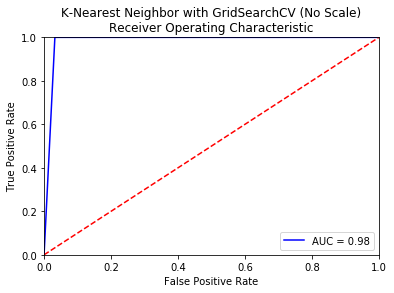

In [212]:
result_auc = getROCAUCProb(knn_grid_noscale, name, X_test, y_test)


In [213]:
#With MinMaxSacler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1,31,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


name = "K-Nearest Neighbor with GridSearchCV (Scaling)"
cv_name = "Stratified K-Folds CV"
cv_name_save = "Stratified CV"
_splits = num_folds = 3
save_name = name
#+" using Stratified "+str(n_splits)+"-Folds CV"

knn = KNeighborsClassifier()


# instantiate the grid
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid,
                  scoring=scoring_clf_gridcv,  cv = num_folds, n_jobs = -1, refit='accuracy', return_train_score=True)


# instantiate and fit the grid
knn_grid.fit(X_train, y_train)


print("**Results**")
print("Model: {}, Cross Validation: {} {} {}{}, Grid Search CV with parameters: {}".format(name, cv_name, "(K =", n_splits, ")", param_grid))

print(pd.DataFrame(knn_grid.cv_results_)[['mean_test_accuracy', 'std_test_accuracy', 'params']])

y_pred = knn_grid.predict(X_test)
print('\nClassification Report: \n', classification_report(y_test, y_pred), '\n')

print('\nConfusion Matrix:')
target_col2='NeedHelp'

print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['[Predicted Not] '+target_col2, '[Predicted] '+target_col2],
    index=['[True Not] '+target_col2, '[True] '+target_col2]
))

saveClfModelResultGridCV(knn_grid, save_name)

**Results**
Model: K-Nearest Neighbor with GridSearchCV (Scaling), Cross Validation: Stratified K-Folds CV (K = 3), Grid Search CV with parameters: {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    mean_test_accuracy  std_test_accuracy  \
0             0.957661           0.029949   
1             0.957661           0.029949   
2             0.957661           0.014256   
3             0.946909           0.014754   
4             0.957661           0.014256   
5             0.946909           0.014754   
6             0.957661           0.014256   
7             0.946909           0.014754   
8             0.957661           0.014256   
9             0.957661           0.014256   
10            0.957661           0.014256   
11            0.957661           0.014256   
12            0.957661           0.014256   
13            0.957661           0.014256   
14            0.957661        

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



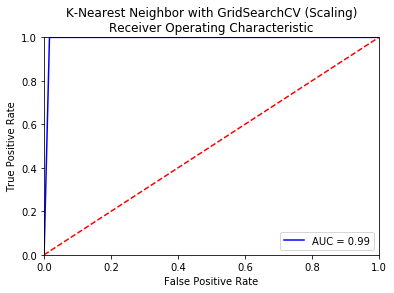

In [215]:
result_auc = getROCAUCProb(knn_grid, name, X_test, y_test)

SVM is computation extensive and hence we avoid using this model.

In [216]:
print("**Best Parameters and Best Scores**")
df_result = pd.DataFrame(clf_best, columns=['best_param', 'mean_accuracy', 'mean_roc_auc', 'weighted_average_precision', 'weighted_average_recall', 'weighted_average_f1'])
df_result.insert(loc=0, column='model name', value=clf_name)
df_result

**Best Parameters and Best Scores**


,model name,best_param,mean_accuracy,mean_roc_auc,weighted_average_precision,weighted_average_recall,weighted_average_f1
0,Decision Tree using Stratified 5-Folds CV,,0.9683,0.6934,0.9593,0.9683,0.9631
1,Decision Tree with GridSearchCV,"{'max_depth': 50, 'min_samples_leaf': 1}",0.9792,0.8333,0.9596,0.9792,0.9691
2,Random Forest Classifier with GridSearchCV,"{'max_depth': 100, 'min_samples_leaf': 2, 'n_e...",0.9577,0.9611,0.9173,0.9577,0.9370
3,K-Nearest Neighbor with GridSearchCV (No Scale),"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.9577,0.5000,0.9173,0.9577,0.9370
4,K-Nearest Neighbor with GridSearchCV (Scaling),"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.9684,0.8222,0.9385,0.9684,0.9530


### Summary ###

We see that of all the models KNN Classifier has the highest AUC, ROC , F1-score.

### Scope of Improvement ###

1. We could use Maps to visalize the schools (color coded) on degree of attention each school requires based on county.
2. More the data over several years, better could be the prediction. We can hence use data from 2010-current. 
However due to limited computation resource, we use the Academic 2019 data.
3. To get a more holistic view of school improvements, we need to also consider other subjects such as English, Arts, Mathematics etc. Since science education throughout public schools (high school) in US has a high disparity, this data can be used to understand the social makeup and belief system and in turn choices of people belonging to certain county.

### References: ###

Feature Engineering (correlation)

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

https://towardsdatascience.com/machine-learning-made-easier-with-pycaret-907e7124efe6

https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

Imbalanced Data:

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Data Source:

http://www.caaspp.org/administration/about/science/index.html
